# Geovisualization

> Geovisualization is the process of **interactively visualizing geographic information through plots, maps or a combination of them**. 

Geovisualization interacts with a number of disciplines including **cartography, visual analytics, information visualization, scientific visualization, statistics, computer science, art-and-design, and cognitive science**; borrowing from and contributing to each.

In this section, we mainly look at the mapping aspects of geovisualization.

![gv1](images/gv1.jpg)


![gv2](images/gv2.png)

## What is a map?

>A map is a **symbolic representation of selected characteristics of place**.  

The key advantage of a map is that it can **represent information of the world in a simple, visual way**. Maps can depict **spatial relationships between features, show size and shape of features, as well as show the spatial distribution of a variable of interest**.

To showcase the power of mapping and its ability to show the spatial distribution, lets take the example of earthquakes (Richter  scale value above 4.5) that occurred in mainland USA from 2012 May. We will look at the aggregate for each states

What does this table indicates

![mapping1](images/mapping1.PNG)

California, Nevada, Idaho and Oklahoma have relatively high number of Earthquakes compared to other states, and some states didn't have even one earthquake with Richter scale value above 4.5. But does it say anything about the spatial distribution of the Earthquakes. For a person without any explicit knowledge about the geography of United States, these are just numbers. But what if we map it (no need to look at the code for now)

In [11]:
import pandas as pd
import geopandas as gpd
data =pd.read_csv(r'../sharedData/earthquake_above4.5_us_only.csv')
geoData = gpd.GeoDataFrame(data,geometry = gpd.points_from_xy(data.longitude,data.latitude),crs='EPSG:4326').to_crs('EPSG:4269')
statesData = gpd.read_file(r'C:\Users\jxa421\sharedData\cb_2018_us_state_20m\cb_2018_us_state_20m.shp')
statesData=statesData.merge(gpd.sjoin(geoData,statesData,predicate='within')[['NAME']].value_counts().reset_index(None).rename(columns={0:'Quake_Counts'}),on='NAME',how='left').fillna(0)
statesData.explore(
     column="Quake_Counts", # make choropleth based on "BoroName" column
     tooltip="Quake_Counts", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     cmap="Reds", # use "Set1" matplotlib colormap
     style_kwds=dict(color="black") # use black outline
    )

What does this indicate??

There seems to be clear spatial pattern with the states in the west having a higher frequency of earthquakes. This is what mapping brings into the table. The ability to decipher such spatial patterns. Now let's get into the details of mapping.

## Types of Maps

### Reference Maps

Reference maps **store data and show a variety of features for a variety of uses**. These maps function like general storehouses of information. 

Let's look at how to load a reference map in QGIS

1. Click on the QuickMapServices from the Toolbar

![mapping2](images/mapping2.png)

2. For this example we are going the standard OSM as our reference map

![mapping3](images/mapping3.png)

3. Voilaaaa!!! You have your interactive reference map ready

![mapping4](images/mapping4.png)

### Thematic Maps

Thematic maps **highlight specific themes**. Their chief goal is to **focus the user’s attention on specific features or characteristics**. They highlight features, data, or concepts, and these data may be **qualitative, quantitative, or both**. Thematic maps can be further divided into two main categories: **qualitative and quantitative**. **Qualitative thematic maps show the spatial extent of categorical, or nominal, data (e.g., soil type, land cover, political districts)**. **Quantitative thematic maps, conversely, demonstrate the spatial patterns of numerical data (e.g., income, age, population)**.

The Earthquake spatial distribution map that we have just shown in the previous section is an example of a thematic map, with count of earthquakes as the underlying variable of interest. So is it a quantitative or a qualitative thematic map??

We will look into the details about creating thematic maps in the upcoming sections.

Based on the category of the underlying data, different types of maps can be generated.

#### Single Symbol Map

Applies the same symbol to every features in the map. 

Let's look at a simple example using our Earthquake dataset

1. Download the dataset from the location https://cwru.box.com/s/e61anmbcxhits2oisk6ir5mnrhlc621i

2. Load the CSV file earthquake_above4.5_us_only.csv to QGIS (use the columns Longitude and Latitude as your spatial columns)

3. You will have a new layer with the same symbol representing all the earthquakes. 

![mapping5](images/mapping5.png)

4. We can add another layer containing the boundaries of us states (this is an example of layering)

Download the US state boundary data from https://cwru.box.com/s/4sya2203iras8r8z7g0ktvqcff5b0if8  (you have to unzip it)

Load it to QGIS

![mapping6](images/mapping6.png)

let's try that in Python!!

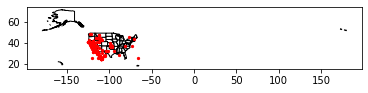

In [2]:
import pandas as pd
import geopandas as gpd
#read the US states file
usStates = gpd.read_file(r'..\sharedData\cb_2018_us_state_20m\cb_2018_us_state_20m.shp')
#create a layer for plotting
usLayer=usStates.plot(color='white', edgecolor='black')
#read the earthquake data
data = pd.read_csv(r'../sharedData/earthquake_above4.5_us_only.csv')
#now conver this into a GeoDataFrame
geoData = gpd.GeoDataFrame(data,geometry = gpd.points_from_xy(data.longitude,data.latitude),crs='EPSG:4326')
#create a layer for plotting. Notice the ax argument
earthQuake = geoData.plot(marker='o', color='red', markersize=5,ax=usLayer)
#now you can see the plot
earthQuake;

As you can see since the states also include the islands, the extents (boundary) for the map is long. We can reduce the map extents to the extent of the earthquakes for a better view. Let's try that program again, this time using the extent of earthquake data as our layer extent.

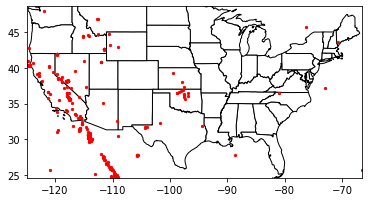

In [3]:
import pandas as pd
import geopandas as gpd
#read the US states file
usStates = gpd.read_file(r'..\sharedData\cb_2018_us_state_20m\cb_2018_us_state_20m.shp')
#create a layer for plotting
usLayer=usStates.plot(color='white', edgecolor='black')
#read the earthquake data
data = pd.read_csv(r'../sharedData/earthquake_above4.5_us_only.csv')
#now conver this into a GeoDataFrame
geoData = gpd.GeoDataFrame(data,geometry = gpd.points_from_xy(data.longitude,data.latitude),crs='EPSG:4326')
#Now use the bounds of this data to set the extent for US layer
eQBounds = geoData.total_bounds
xlim = ([eQBounds[0],  eQBounds[2]])
ylim = ([eQBounds[1],  eQBounds[3]])
usLayer.set_xlim(xlim)
usLayer.set_ylim(ylim)
#create a layer for plotting. Notice the ax argument
earthQuake = geoData.plot(marker='o', color='red', markersize=5,ax=usLayer)
#now you can see the plot
earthQuake;

#### Categorized Symbol Map

We used categorized symbol map to **represent nominal data**. **Nominal data is data that can be labelled or classified into mutually exclusive categories within a variable.** Let's look at developing a categorized symbol map. For this example, we are going to use the land use data (the term used to describe the human use of land)

1. Download the data from https://cwru.box.com/s/7x2vxdq3zid4zef0skrbk9msxtyqep0l   (propsedlanduseCleveland.zip)

2. Load the dataset to QGIS

![mapping7](images/mapping7.png)

3. Select properties by right clicking on the layer

![mapping8](images/mapping8.png)

4. Select Symbology from the left side bar and select categorized.

![mapping9](images/mapping9.png)

5. For the Value option, select "PROPOSED"

![mapping10](images/mapping10.png)

6. Click Apply

![mapping11](images/mapping11.png)

Each unique value for the PROPOSED column will be represented using a different color.

Let's try that out in Python

(-81.72951207892656, -81.67071019375801, 41.45067614282116, 41.480042495366376)

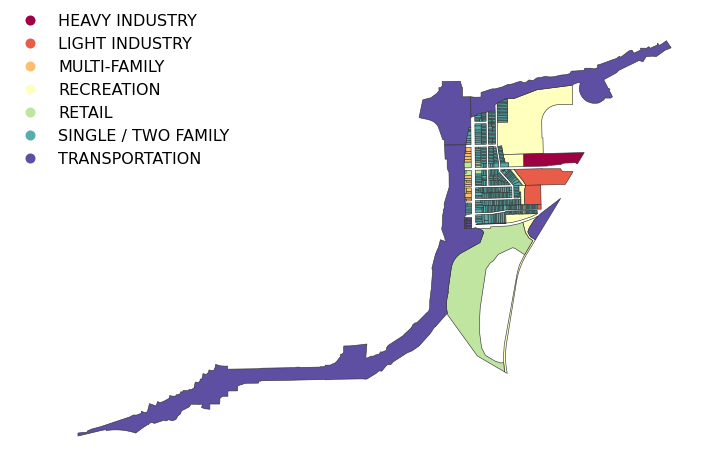

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(14,8))
data = gpd.read_file('../sharedData/propsedlanduseCleveland/proposedlanduse_for2020_Cleveland.shp')
data.plot(column='PROPOSED', categorical=True, cmap='Spectral', linewidth=.6, edgecolor='0.2',
         legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False},ax=ax)
ax.axis('off')

#### Proportional Symbol Map

A proportional symbol map represents **quantitative variables using symbols whose sizes are proportional to the value of the variable**. That is, the map uses the visual variable size (the only one with the quantitative property) to transmit the value of the variable being represented.

Let's look at our earthquake example. We are going to use the centroid of each state as out geometry and the total number of earthquake as our mapping variable

1. Download the files from https://cwru.box.com/s/6upfobv81vw1g4yok5tadh0xc1swxuty

2. Load the file to QGIS

3. Now go to properties and then select symbology.

4. From the drop down select graduated and for the value select Quake_coun. For method select size. From the mode select "Natural Breaks" and select classes as 4 and size "from" to "to" could 2 and 8.  

![mapping12](images/mapping12.png)

5. Click on apply and click add. You can use state boundaries for reference (just load them to QGIS).

![mapping13](images/mapping13.png)

#### Choropleth Maps

A choropleth map uses different shading and colors based on quantitative data. They are one of the most common type of thematic maps used today. We have already seen one choropleth map in our example for mapping the EarthQuake data. 

Generally choropleth maps are used to represent continous variables such as rates and ratios. The map shown below is an example of choropleth map which shows the median household income across different states in United States for the year 2018

![mapping14](images/mapping14.jpg)

Now let's create our own choropleth maps. For our first map, we will use the race data for each state to create choropleth map of Percentage of White Population and Percentage of Black Population

1. Download the data from https://cwru.box.com/s/gvj0n1oc5z67iqiw1lyxoq183ib6k0t1

2. Load to QGIS

3. Select Properties and select symbology and from the drop down select Graduated.

4. For Value select WhiteTotal (percentage of Whites in the total population)

5. Select the Mode as Equal Count (Quantile), and total classes as 5 (we will explain in detail what these options are)

5. Select the color ramp as reds.

6. Click on classify. You will see five different classes.

![mapping15](images/mapping15.png)

7. Now click on Apply

![mapping16](images/mapping16.png)

Now you can do the same for BlackTotal (by changing the value field)

![mapping17](images/mapping17.png)

Or for the Asian population

![mapping18](images/mapping18.png)

Now lets look in detail about the classifications scheme we are using for creating these choropleth maps.

##### Classification Schemes

1. **Quantiles**

**Quantiles** will place an **equal number of observations in each class**: For example if you have 30 counties and 6 data classes, you’ll have 5 counties in each class. The problem with quantiles is that you can end up with classes that have very different numerical ranges. All the maps that we have shown in the last section where using quantiles classification schemes. As you can notice there are almost equal number of states in each class, but if you notice the percentage ranges they are vastly different. 

Let's try that out in Python

In [4]:
import geopandas as gpd
data = gpd.read_file('../sharedData/statebyrace/statebyrace.shp')
dataNew = data.loc[~data.NAME.isin(['Hawaii','Puerto Rico','Alaska'])]

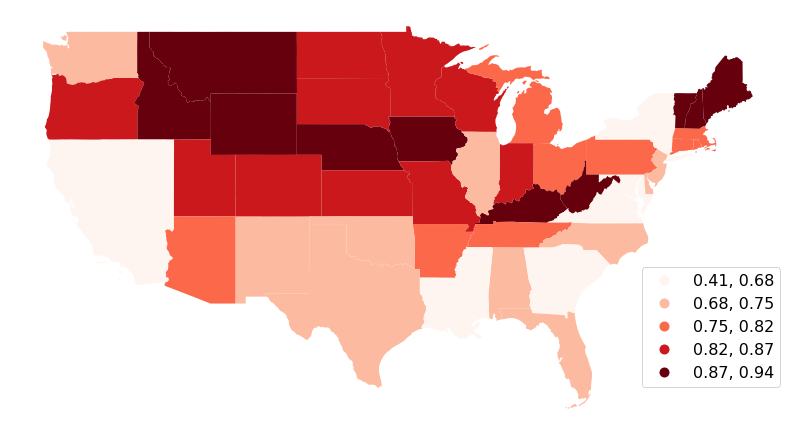

In [5]:
fig, ax = plt.subplots(1, figsize=(14,8))
dataNew.plot(column='WhiteTotal', cmap='Reds', scheme='quantiles',k=5,ax=ax,legend=True,legend_kwds={'bbox_to_anchor':(1, .4),'fontsize':16});
ax.axis('off');

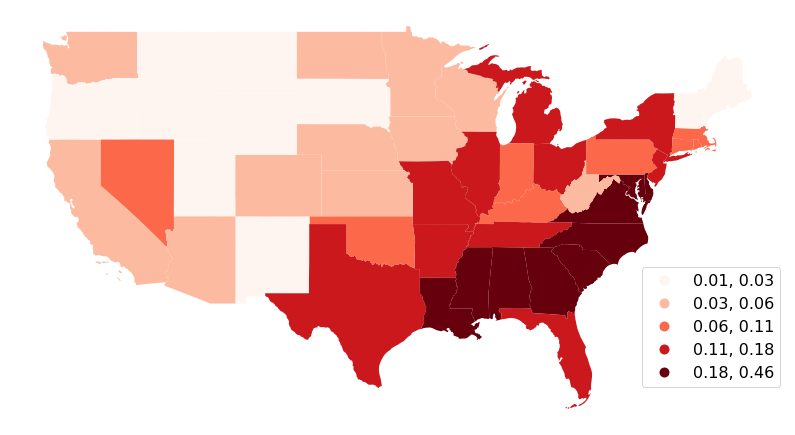

In [6]:
fig, ax = plt.subplots(1, figsize=(14,8))
dataNew.plot(column='BlackTotal', cmap='Reds', scheme='quantiles',k=5,ax=ax,legend=True,legend_kwds={'bbox_to_anchor':(1, .4),'fontsize':16});
ax.axis('off');

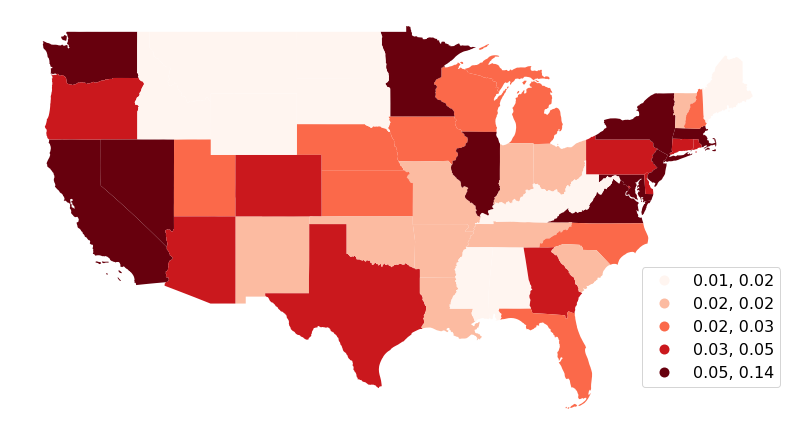

In [7]:
fig, ax = plt.subplots(1, figsize=(14,8))
dataNew.plot(column='AsianTotal', cmap='Reds', scheme='quantiles',k=5,ax=ax,legend=True,legend_kwds={'bbox_to_anchor':(1, .4),'fontsize':16});
ax.axis('off');

2. **Equal Interval**

Equal Interval **divides the data into equal size classes** (e.g., 0-10, 10-20, 20-30, etc.) and works best on data that is generally spread across the entire range. **Avoid equal interval if your data are skewed to one end or if you have one or two really large outlier values**. Outliers in that case will likely produce empty classes, wasting perfectly good classes with no observations in them.

Let's try Equal Interval classification for WhiteTotal as value (select Equal Interval for mode)

![mapping19](images/mapping19.png)

As you can see now the class intervals have the same width, but the number of states that falls in each class is drastically different. 

Now let's try that in Python.

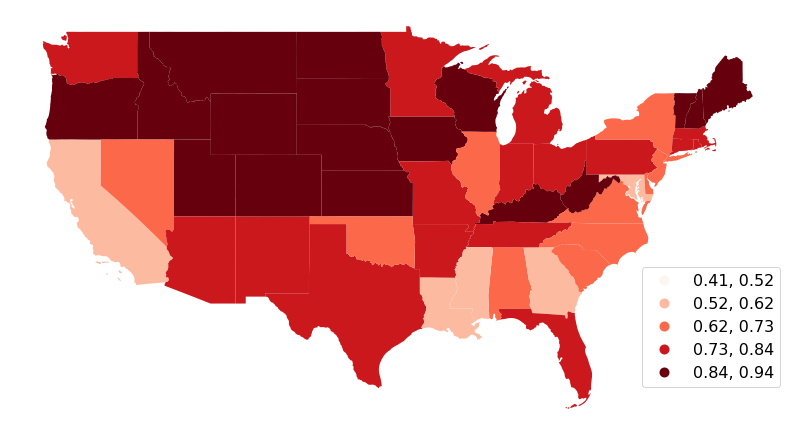

In [8]:
fig, ax = plt.subplots(1, figsize=(14,8))
dataNew.plot(column='WhiteTotal', cmap='Reds', scheme='equal_interval',k=5,ax=ax,legend=True,legend_kwds={'bbox_to_anchor':(1, .4),'fontsize':16});
ax.axis('off');

3. **Natural Breaks**

Natural Breaks is a kind of **"optimal" classification scheme that finds class breaks that (for a given number of classes) will minimize within-class variance and maximize between-class differences**. One drawback of this approach is **each dataset generates a unique classification solution**, and if you need to make comparison across maps, such as in an atlas or a series (e.g., one map each for 1980, 1990, 2000) you might want to use a single scheme that can be applied across all of the maps.

Let's try Natural Breaks for WhiteTotal as value

![mapping20](images/mapping20.png)

Let's try this in Python.

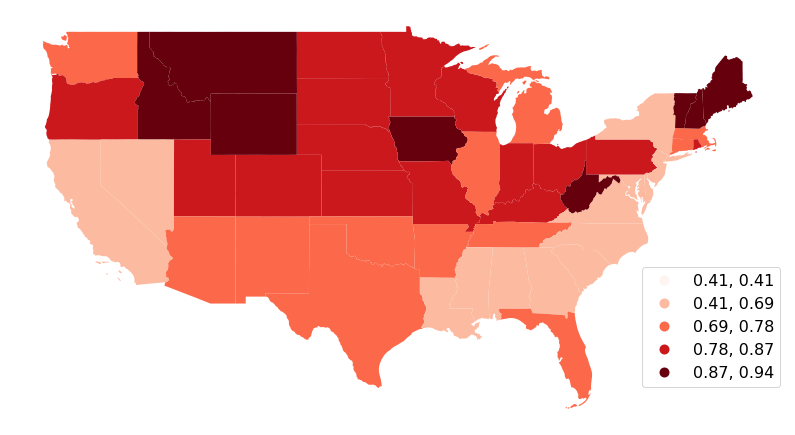

In [9]:
fig, ax = plt.subplots(1, figsize=(14,8))
dataNew.plot(column='WhiteTotal', cmap='Reds', scheme='natural_breaks',k=5,ax=ax,legend=True,legend_kwds={'bbox_to_anchor':(1, .4),'fontsize':16});
ax.axis('off');

4. **Standard Deviation Classification**

Standard deviation is a **statistical technique type of map based on how much the data differs from the mean**. Initially the mean and standard deviation is calculated and each standard deviation is assigned as a class. 

Let's try Standard Deviation classification for WhiteTotal as value

![mapping21](images/mapping21.png)

As you can see standard deviation didn't take the number of classes into consideration and created only two classes, one containing values one standard deviation less than mean and one containing values one standard deviation greater than mean. 


What about number of Classes??

This is basically a cartographers choice and generally the rule of thumb is that it should be between 3 and 7. The more classes you have, the tough it will be to interpret the colors.

Let's try this in Python.

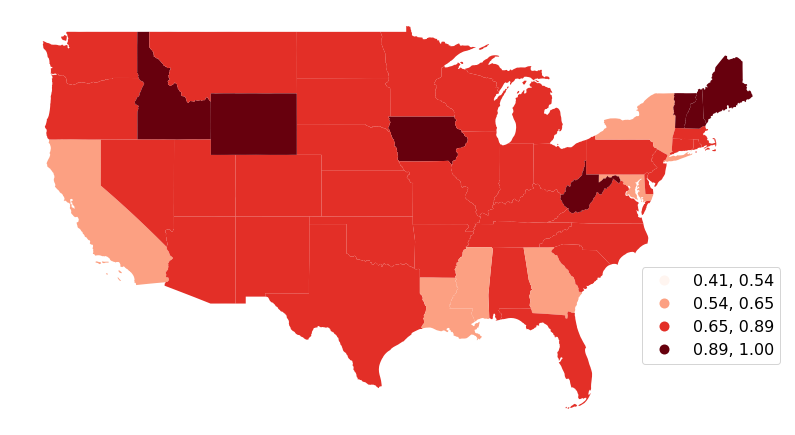

In [10]:
fig, ax = plt.subplots(1, figsize=(14,8))
dataNew.plot(column='WhiteTotal', cmap='Reds', scheme='std_mean',k=5,ax=ax,legend=True,legend_kwds={'bbox_to_anchor':(1, .4),'fontsize':16});
ax.axis('off');

##### Some Limitations of Choropleth Maps

1. **Sharp change in the boundaries between areas, which might be interpreted as an abrupt change in the variable value in that boundary**. This could hide **continuity of data**.

2. Another problem is the **homogeneity within each area**, which might lead to thinking that the **variable has a uniform distribution, even if that is false**.

3. Non-uniform areal unit and the problem of counts.

Based on the various zones aggregation various choropleth maps could be produced. 

![mapping22](images/mapping22.png)

4. Based on various ways of aggregation even the relationship between variables can change. This effect is sometimes called Modifiable Areal Unit Problem (MAUP)

Suppose there are two variables v1 and v2 with following distributions

![mapping23](images/mapping23.png)

As you can see, the two variables have almost no correlation (.001)

But if you aggregate the points to grids as shown below the correlation coefficient changes to (.03)

![mapping24](images/mapping24.png)

And if you aggregate the variables as shown below the correlation coefficient changes to (.75) indicating high correlation between the variables. 

![mapping25](images/mapping25.png)

The point is that, just by aggregating the variables at different spatial scales the underlying statistics changes. 

5. Ecological Fallacy. Failure in reasoning that arises when an inference is made about an individual based on aggregate data for a group. For example the per-capita income for this zip code is low, and hence anyone coming from this zip code is broke!!

6. The problem of small numbers. When the rates required for choropleth maps are carried out for small areas, they tend to be unstable. 

## Creating a Professional Map

While not a focus of this course, cartography is an art as well as skill. It takes a lot of practice to create good maps and there are many do's and don’ts while creating maps. Let's make a professional map with all the required components. For this example we will use the social vulnerability index (svi) data from CDC (https://www.atsdr.cdc.gov/placeandhealth/svi/data_documentation_download.html).

1. Download the data from https://cwru.box.com/s/3hl1aflu2m9gvm4ihhtckrrh37d28ai8

2. Load the data to QGIS. We will be using the column RPL_THEMES for mapping. A high value for RPL_THEMES indicate high social vulnerability and a low value indicates low social vulnerability. 

3. Create a choropleth with Equal Interval classification, 5 classes (use RdYlGN color ramp and then invert the color map so green represents low values and red represents height values)

![mapping26](images/mapping26.PNG)

4. Now we want to create a printable quality map

From the project menu select 'New Print Layout'

![mapping27](images/mapping27.PNG)

5. Click on the Add Map button the left sidebar and then use the mouse pointer to draw a rectangle covering the entire map area. A new map will be corrected.

![mapping28](images/mapping28.PNG)

6. Now add a legend by clicking on the "Add Legend" option and drawing it on the map (In this example I have drawn in right bottom).

![mapping29](images/mapping29.PNG)

Now modify the legend to make it more legible.

Click on the legend and use the Item Properties (right taskbar) to change values

Uncheck the Auto update option, and check the hidden option by right clicking on the layer name

![mapping30](images/mapping30.PNG)

Give appropriate title for the Legend (This is critical. Legends always should have title!!!!!!)

![mapping31](images/mapping31.PNG)

Provide a frame around the legend

![mapping32](images/mapping32.PNG)

7. Add a scale bar at the bottom

![mapping33](images/mapping33.PNG)

8. Using Add Label add a Title for the map

![mapping34](images/mapping34.PNG)

9. Now export the map in pdf format

![mapping35](images/mapping35.PNG)

That's it!!!!. Your professional map is ready. 

In the next section, we will look into the various analytical aspect of GIS and how it can be used for spatial analysis. So stay tuned!!! 